# LDA  supervised

# feature selection 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("Wine.csv")

In [3]:
x = dataset.iloc[:,0:13].values
y = dataset.iloc[:,-1].values

In [4]:
# split our data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

In [5]:
# feature scalling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# we apply PCA after the preprocessing 

# now we had to apply our first dimensionality reduction LDA

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [8]:
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

# now are ready to fit the regression logistic 

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
classifier = LogisticRegression(random_state=0)

In [13]:
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_predict = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cm = confusion_matrix(y_test,y_predict)

In [17]:
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [18]:
accuray = (14+16+6)/36

In [19]:
accuray

1.0

In [20]:
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


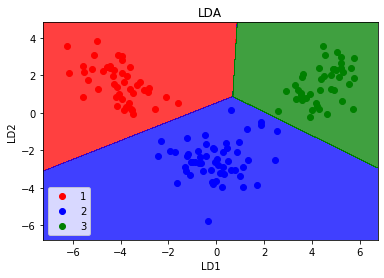

In [22]:
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start= x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                   (np.arange(start= x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01)))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap=ListedColormap(("red","blue","green")))


plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(("red","blue","green"))(i),label=j)
plt.title("LDA")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()